# TODO

- Reviwe this cell then delete

## 1-3

Parsers:
- Parser for concurrent session data
- Parser for httpperf-detailed output
- Parser for httperf summary output
- Parser for perform data (Justin)

## 4
- Review 4a (Richard)
- Finish 4c - 4f (Richard)

## 5
- WILLIE, from part 4 Show that the cpu utlization would be more likely to be the bottle neck or delete this part. 
- Delete this note

## Misc
Clean up answers to be easy-to-read and in order

## Work distribution & Deadlines

2 - 3: Justin, Richard, Willie
4, 5, 6: Mix of everyone else, moreso Willie and Erik

Before Feb. 18, finish parsers and parts 2-3. 

Before Feb. 25, finish 4, 5, 6 and the document. 

---


Written by:
 - Justin Tijunelis
 - Richard Lee
 - Erik Skoronski
 - QiFeng Li

# Imports

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import datetime

# Concurrent Session Parsing

In [2]:
# Parse histogram data for number of concurrent users
def parse_concurrent_session_data(file):
  df = pd.read_csv(file)
  # Note space in front of "frequency"...exact string: ' frequency of occurence'
  df = df.rename(columns={'# of concurrent sessions': 'num_sessions', ' frequency of occurence': 'frequency'})
  return df

df = parse_concurrent_session_data("Case1_Data/case1-concurrent-sessions-histogram.txt")
# print(df.head(5))
display(df)

,num_sessions,frequency
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


# 4. Analyzing _perfmon_ Data

# Perfmon Parsing

In [3]:
def parse_perfmon(file):
  df = pd.read_csv(file, sep=',')
  df = df.rename(columns={
    r'Time': 'time',
  r'\PhysicalDisk(_Total)\% Disk Time': 'physicaldisk_total_disk_time',
    r'\Memory\Available Bytes': 'memory_available_bytes',
    r'\Memory\Cache Bytes': 'memory_cache_bytes',
    r'\Memory\Cache Faults/sec': 'memory_cache_faults_sec',
    r'\Memory\Page Faults/sec': 'memory_page_faults_sec',
    r'\Memory\Page Reads/sec': 'memory_page_reads_sec',
    r'\Memory\Page Writes/sec': 'memory_page_writes_sec',
    r'\Memory\Pages Input/sec': 'memory_pages_input_sec',
    r'\Memory\Pages Output/sec': 'memory_pages_output_sec',
    r'\Memory\Pool Nonpaged Bytes': 'memory_pool_nonpaged_bytes',
    r'\Network Segment(\Device\bh_El90x1)\% Network utilization': 'network_segment_device_bh_el90x1_network_utilization',
    r'\Network Segment(\Device\bh_El90x1)\Total bytes received/second': 'network_segment_device_bh_el90x1_total_bytes_received_second',
    r'\Paging File(_Total)\% Usage Peak': 'paging_file_total_usage_peak',
    r'\Paging File(_Total)\% Usage': 'paging_file_total_usage',
    r'\Processor(0)\% DPC Time': 'processor_0_dpc_time',
    r'\Processor(0)\% Interrupt Time': 'processor_0_interrupt_time',
    r'\Processor(0)\% Privileged Time': 'processor_0_privileged_time',
    r'\Processor(0)\% Processor Time': 'processor_0_processor_time',
    r'\Processor(0)\% User Time': 'processor_0_user_time',
    r'\Processor(0)\APC Bypasses/sec': 'processor_0_apc_bypasses_sec',
    r'\Processor(0)\DPC Bypasses/sec': 'processor_0_dpc_bypasses_sec',
    r'\Processor(0)\DPC Rate': 'processor_0_dpc_rate',
    r'\Processor(0)\DPCs Queued/sec': 'processor_0_dpcs_queued_sec',
    r'\Processor(0)\Interrupts/sec': 'processor_0_interrupts_sec',
    r'\System\Alignment Fixups/sec': 'system_alignment_fixups_sec',
    r'\System\Context Switches/sec': 'system_context_switches_sec',
    r'\System\Exception Dispatches/sec': 'system_exception_dispatches_sec',
    r'\System\Processor Queue Length': 'system_processor_queue_length',
    r'\System\System Calls/sec': 'system_system_calls_sec',
    r'\Process(Idle)\% Processor Time': 'process_idle_processor_time',
    r'\Process(db2syscs)\Page Faults/sec': 'process_db2syscs_page_faults_sec',
    r'\Process(db2syscs)\Working Set Peak': 'process_db2syscs_working_set_peak',
    r'\Process(db2syscs)\Page File Bytes Peak': 'process_db2syscs_page_file_bytes_peak',
    r'\Process(db2syscs)\% Privileged Time': 'process_db2syscs_privileged_time',
    r'\Process(db2syscs)\% User Time': 'process_db2syscs_user_time',
    r'\Process(db2syscs)\Handle Count': 'process_db2syscs_handle_count',
    r'\Process(db2syscs)\Thread Count': 'process_db2syscs_thread_count',
    r'\\isp-01\Cache\Copy Read Hits %': 'isp_01_cache_copy_read_hits',
    r'\\isp-01\Cache\Copy Reads/sec': 'isp_01_cache_copy_reads_sec',
    r'\\isp-01\Cache\Data Flushes/sec': 'isp_01_cache_data_flushes_sec',
    r'\\isp-01\Cache\Lazy Write Flushes/sec': 'isp_01_cache_lazy_write_flushes_sec',
    r'\\isp-01\Cache\Lazy Write Pages/sec': 'isp_01_cache_lazy_write_pages_sec',
    r'\\isp-01\Cache\Read Aheads/sec': 'isp_01_cache_read_aheads_sec',
    r'\\isp-01\IP\Datagrams Forwarded/sec': 'isp_01_ip_datagrams_forwarded_sec',
    r'\\isp-01\IP\Datagrams Outbound Discarded': 'isp_01_ip_datagrams_outbound_discarded',
    r'\\isp-01\IP\Datagrams Received Discarded': 'isp_01_ip_datagrams_received_discarded',
    r'\\isp-01\IP\Datagrams Received/sec': 'isp_01_ip_datagrams_received_sec',
    r'\\isp-01\IP\Datagrams Sent/sec': 'isp_01_ip_datagrams_sent_sec',
    r'\\isp-01\IP\Datagrams/sec': 'isp_01_ip_datagrams_sec',
    r'\\isp-01\PhysicalDisk(_Total)\% Disk Time': 'isp_01_physicaldisk_total_disk_time',
    r'\\isp-01\PhysicalDisk(_Total)\Avg. Disk Bytes/Read': 'isp_01_physicaldisk_total_avg_disk_bytes_read',
    r'\\isp-01\PhysicalDisk(_Total)\Avg. Disk Bytes/Write': 'isp_01_physicaldisk_total_avg_disk_bytes_write',
    r'\\isp-01\PhysicalDisk(_Total)\Avg. Disk Queue Length': 'isp_01_physicaldisk_total_avg_disk_queue_length',
    r'\\isp-01\PhysicalDisk(_Total)\Avg. Disk Sec/Read': 'isp_01_physicaldisk_total_avg_disk_sec_read',
    r'\\isp-01\PhysicalDisk(_Total)\Avg. Disk Sec/Write': 'isp_01_physicaldisk_total_avg_disk_sec_write',
    r'\\isp-01\PhysicalDisk(_Total)\Current Disk Queue Length': 'isp_01_physicaldisk_total_current_disk_queue_length',
    r'\\isp-01\PhysicalDisk(_Total)\Disk Read Bytes/sec': 'isp_01_physicaldisk_total_disk_read_bytes_sec',
    r'\\isp-01\PhysicalDisk(_Total)\Disk Reads/sec': 'isp_01_physicaldisk_total_disk_reads_sec',
    r'\\isp-01\PhysicalDisk(_Total)\Disk Write Bytes/sec': 'isp_01_physicaldisk_total_disk_write_bytes_sec',
    r'\\isp-01\PhysicalDisk(_Total)\Disk Writes/sec': 'isp_01_physicaldisk_total_disk_writes_sec',
    r'\\isp-01\LogicalDisk(_Total/_Total)\% Free Space': 'isp_01_logicaldisk_total_total_free_space',
    r'\\isp-01\LogicalDisk(_Total/_Total)\Free Megabytes': 'isp_01_logicaldisk_total_total_free_megabytes',
    r'\\isp-01\Memory\Available Bytes': 'isp_01_memory_available_bytes',
    r'\\isp-01\Memory\Cache Bytes': 'isp_01_memory_cache_bytes',
    r'\\isp-01\Memory\Cache Faults/sec': 'isp_01_memory_cache_faults_sec',
    r'\\isp-01\Memory\Page Faults/sec': 'isp_01_memory_page_faults_sec',
    r'\\isp-01\Memory\Page Reads/sec': 'isp_01_memory_page_reads_sec',
    r'\\isp-01\Memory\Page Writes/sec': 'isp_01_memory_page_writes_sec',
    r'\\isp-01\Memory\Pages Input/sec': 'isp_01_memory_pages_input_sec',
    r'\\isp-01\Memory\Pages Output/sec': 'isp_01_memory_pages_output_sec',
    r'\\isp-01\Memory\Pool Nonpaged Bytes': 'isp_01_memory_pool_nonpaged_bytes',
    r'\\isp-01\Network Interface(3)\Bytes Received/sec': 'isp_01_network_interface_3_bytes_received_sec',
    r'\\isp-01\Network Interface(3)\Bytes Sent/sec': 'isp_01_network_interface_3_bytes_sent_sec',
    r'\\isp-01\Network Interface(3)\Bytes Total/sec': 'isp_01_network_interface_3_bytes_total_sec',
    r'\\isp-01\Network Interface(3)\Output Queue Length': 'isp_01_network_interface_3_output_queue_length',
    r'\\isp-01\Network Interface(3)\Packets Outbound Discarded': 'isp_01_network_interface_3_packets_outbound_discarded',
    r'\\isp-01\Network Interface(3)\Packets Received Discarded': 'isp_01_network_interface_3_packets_received_discarded',
    r'\\isp-01\Paging File(_Total)\% Usage Peak': 'isp_01_paging_file_total_usage_peak',
    r'\\isp-01\Paging File(_Total)\% Usage': 'isp_01_paging_file_total_usage',
    r'\\isp-01\Processor(0)\% DPC Time': 'isp_01_processor_0_dpc_time',
    r'\\isp-01\Processor(0)\% Interrupt Time': 'isp_01_processor_0_interrupt_time',
    r'\\isp-01\Processor(0)\% Privileged Time': 'isp_01_processor_0_privileged_time',
    r'\\isp-01\Processor(0)\% Processor Time': 'isp_01_processor_0_processor_time',
    r'\\isp-01\Processor(0)\% User Time': 'isp_01_processor_0_user_time',
    r'\\isp-01\Processor(0)\APC Bypasses/sec': 'isp_01_processor_0_apc_bypasses_sec',
    r'\\isp-01\Processor(0)\DPC Bypasses/sec': 'isp_01_processor_0_dpc_bypasses_sec',
    r'\\isp-01\Processor(0)\DPC Rate': 'isp_01_processor_0_dpc_rate',
    r'\\isp-01\Processor(0)\DPCs Queued/sec': 'isp_01_processor_0_dpcs_queued_sec',
    r'\\isp-01\Processor(0)\Interrupts/sec': 'isp_01_processor_0_interrupts_sec',
    r'\\isp-01\Processor(1)\% DPC Time': 'isp_01_processor_1_dpc_time',
    r'\\isp-01\Processor(1)\% Interrupt Time': 'isp_01_processor_1_interrupt_time',
    r'\\isp-01\Processor(1)\% Privileged Time': 'isp_01_processor_1_privileged_time',
    r'\\isp-01\Processor(1)\% Processor Time': 'isp_01_processor_1_processor_time',
    r'\\isp-01\Processor(1)\% User Time': 'isp_01_processor_1_user_time',
    r'\\isp-01\Processor(1)\APC Bypasses/sec': 'isp_01_processor_1_apc_bypasses_sec',
    r'\\isp-01\Processor(1)\DPC Bypasses/sec': 'isp_01_processor_1_dpc_bypasses_sec',
    r'\\isp-01\Processor(1)\DPC Rate': 'isp_01_processor_1_dpc_rate',
    r'\\isp-01\Processor(1)\DPCs Queued/sec': 'isp_01_processor_1_dpcs_queued_sec',
    r'\\isp-01\Processor(1)\Interrupts/sec': 'isp_01_processor_1_interrupts_sec',
    r'\\isp-01\System\Alignment Fixups/sec': 'isp_01_system_alignment_fixups_sec',
    r'\\isp-01\System\Context Switches/sec': 'isp_01_system_context_switches_sec',
    r'\\isp-01\System\Exception Dispatches/sec': 'isp_01_system_exception_dispatches_sec',
    r'\\isp-01\System\Processor Queue Length': 'isp_01_system_processor_queue_length',
    r'\\isp-01\System\System Calls/sec': 'isp_01_system_system_calls_sec',
    r'\\isp-01\TCP\Connection Failures': 'isp_01_tcp_connection_failures',
    r'\\isp-01\TCP\Connections Active': 'isp_01_tcp_connections_active',
    r'\\isp-01\TCP\Connections Established': 'isp_01_tcp_connections_established',
    r'\\isp-01\TCP\Connections Passive': 'isp_01_tcp_connections_passive',
    r'\\isp-01\TCP\Connections Reset': 'isp_01_tcp_connections_reset',
    r'\\isp-01\TCP\Segments Received/sec': 'isp_01_tcp_segments_received_sec',
    r'\\isp-01\TCP\Segments Retransmitted/sec': 'isp_01_tcp_segments_retransmitted_sec',
    r'\\isp-01\TCP\Segments Sent/sec': 'isp_01_tcp_segments_sent_sec',
    r'\\isp-01\TCP\Segments/sec': 'isp_01_tcp_segments_sec',
    r'\\isp-01\Process(Idle)\% Processor Time': 'isp_01_process_idle_processor_time',
    r'\\isp-01\Process(srvrctrl)\Page Faults/sec': 'isp_01_process_srvrctrl_page_faults_sec',
    r'\\isp-01\Process(srvrctrl)\Working Set Peak': 'isp_01_process_srvrctrl_working_set_peak',
    r'\\isp-01\Process(srvrctrl)\Page File Bytes Peak': 'isp_01_process_srvrctrl_page_file_bytes_peak',
    r'\\isp-01\Process(srvrctrl)\% Privileged Time': 'isp_01_process_srvrctrl_privileged_time',
    r'\\isp-01\Process(srvrctrl)\% User Time': 'isp_01_process_srvrctrl_user_time',
    r'\\isp-01\Process(srvrctrl)\Handle Count': 'isp_01_process_srvrctrl_handle_count',
    r'\\isp-01\Process(srvrctrl)\Thread Count': 'isp_01_process_srvrctrl_thread_count',
    r'\\isp-01\Process(wHTTPg)\Page Faults/sec': 'isp_01_process_whttpg_page_faults_sec',
    r'\\isp-01\Process(wHTTPg)\Working Set Peak': 'isp_01_process_whttpg_working_set_peak',
    r'\\isp-01\Process(wHTTPg)\Page File Bytes Peak': 'isp_01_process_whttpg_page_file_bytes_peak',
    r'\\isp-01\Process(wHTTPg)\% Privileged Time': 'isp_01_process_whttpg_privileged_time',
    r'\\isp-01\Process(wHTTPg)\% User Time': 'isp_01_process_whttpg_user_time',
    r'\\isp-01\Process(wHTTPg)\Handle Count': 'isp_01_process_whttpg_handle_count',
    r'\\isp-01\Process(wHTTPg)\Thread Count': 'isp_01_process_whttpg_thread_count',
    r'\\isp-01\Process(scheduler)\Page Faults/sec': 'isp_01_process_scheduler_page_faults_sec',
    r'\\isp-01\Process(scheduler)\Working Set Peak': 'isp_01_process_scheduler_working_set_peak',
    r'\\isp-01\Process(scheduler)\Page File Bytes Peak': 'isp_01_process_scheduler_page_file_bytes_peak',
    r'\\isp-01\Process(scheduler)\% Privileged Time': 'isp_01_process_scheduler_privileged_time',
    r'\\isp-01\Process(scheduler)\% User Time': 'isp_01_process_scheduler_user_time',
    r'\\isp-01\Process(scheduler)\Handle Count': 'isp_01_process_scheduler_handle_count',
    r'\\isp-01\Process(scheduler)\Thread Count': 'isp_01_process_scheduler_thread_count',
    r'\\isp-01\Process(server#0)\Page Faults/sec': 'isp_01_process_server_0_page_faults_sec',
    r'\\isp-01\Process(server#0)\Working Set Peak': 'isp_01_process_server_0_working_set_peak',
    r'\\isp-01\Process(server#0)\Page File Bytes Peak': 'isp_01_process_server_0_page_file_bytes_peak',
    r'\\isp-01\Process(server#0)\% Privileged Time': 'isp_01_process_server_0_privileged_time',
    r'\\isp-01\Process(server#0)\% User Time': 'isp_01_process_server_0_user_time',
    r'\\isp-01\Process(server#0)\Handle Count': 'isp_01_process_server_0_handle_count',
    r'\\isp-01\Process(server#0)\Thread Count': 'isp_01_process_server_0_thread_count',
    r'\\isp-01\Process(server#1)\Page Faults/sec': 'isp_01_process_server_1_page_faults_sec',
    r'\\isp-01\Process(server#1)\Working Set Peak': 'isp_01_process_server_1_working_set_peak',
    r'\\isp-01\Process(server#1)\Page File Bytes Peak': 'isp_01_process_server_1_page_file_bytes_peak',
    r'\\isp-01\Process(server#1)\% Privileged Time': 'isp_01_process_server_1_privileged_time',
    r'\\isp-01\Process(server#1)\% User Time': 'isp_01_process_server_1_user_time',
    r'\\isp-01\Process(server#1)\Handle Count': 'isp_01_process_server_1_handle_count',
    r'\\isp-01\Process(server#1)\Thread Count': 'isp_01_process_server_1_thread_count',
    r'\\isp-01\Process(server#2)\Page Faults/sec': 'isp_01_process_server_2_page_faults_sec',
    r'\\isp-01\Process(server#2)\Working Set Peak': 'isp_01_process_server_2_working_set_peak',
    r'\\isp-01\Process(server#2)\Page File Bytes Peak': 'isp_01_process_server_2_page_file_bytes_peak',
    r'\\isp-01\Process(server#2)\% Privileged Time': 'isp_01_process_server_2_privileged_time',
    r'\\isp-01\Process(server#2)\% User Time': 'isp_01_process_server_2_user_time',
    r'\\isp-01\Process(server#2)\Handle Count': 'isp_01_process_server_2_handle_count',
    r'\\isp-01\Process(server#2)\Thread Count': 'isp_01_process_server_2_thread_count',
    r'\\isp-01\Process(server#3)\Page Faults/sec': 'isp_01_process_server_3_page_faults_sec',
    r'\\isp-01\Process(server#3)\Working Set Peak': 'isp_01_process_server_3_working_set_peak',
    r'\\isp-01\Process(server#3)\Page File Bytes Peak': 'isp_01_process_server_3_page_file_bytes_peak',
    r'\\isp-01\Process(server#3)\% Privileged Time': 'isp_01_process_server_3_privileged_time',
    r'\\isp-01\Process(server#3)\% User Time': 'isp_01_process_server_3_user_time',
    r'\\isp-01\Process(server#3)\Handle Count': 'isp_01_process_server_3_handle_count',
    r'\\isp-01\Process(server#3)\Thread Count': 'isp_01_process_server_3_thread_count',
    r'\\isp-01\Process(server#4)\Page Faults/sec': 'isp_01_process_server_4_page_faults_sec',
    r'\\isp-01\Process(server#4)\Working Set Peak': 'isp_01_process_server_4_working_set_peak',
    r'\\isp-01\Process(server#4)\Page File Bytes Peak': 'isp_01_process_server_4_page_file_bytes_peak',
    r'\\isp-01\Process(server#4)\% Privileged Time': 'isp_01_process_server_4_privileged_time',
    r'\\isp-01\Process(server#4)\% User Time': 'isp_01_process_server_4_user_time',
    r'\\isp-01\Process(server#4)\Handle Count': 'isp_01_process_server_4_handle_count',
    r'\\isp-01\Process(server#4)\Thread Count': 'isp_01_process_server_4_thread_count',
    r'\\isp-01\Process(server#5)\Page Faults/sec': 'isp_01_process_server_5_page_faults_sec',
    r'\\isp-01\Process(server#5)\Working Set Peak': 'isp_01_process_server_5_working_set_peak',
    r'\\isp-01\Process(server#5)\Page File Bytes Peak': 'isp_01_process_server_5_page_file_bytes_peak',
    r'\\isp-01\Process(server#5)\% Privileged Time': 'isp_01_process_server_5_privileged_time',
    r'\\isp-01\Process(server#5)\% User Time': 'isp_01_process_server_5_user_time',
    r'\\isp-01\Process(server#5)\Handle Count': 'isp_01_process_server_5_handle_count',
    r'\\isp-01\Process(server#5)\Thread Count': 'isp_01_process_server_5_thread_count',
    r'\\isp-01\Process(server#6)\Page Faults/sec': 'isp_01_process_server_6_page_faults_sec',
    r'\\isp-01\Process(server#6)\Working Set Peak': 'isp_01_process_server_6_working_set_peak',
    r'\\isp-01\Process(server#6)\Page File Bytes Peak': 'isp_01_process_server_6_page_file_bytes_peak',
    r'\\isp-01\Process(server#6)\% Privileged Time': 'isp_01_process_server_6_privileged_time',
    r'\\isp-01\Process(server#6)\% User Time': 'isp_01_process_server_6_user_time',
    r'\\isp-01\Process(server#6)\Handle Count': 'isp_01_process_server_6_handle_count',
    r'\\isp-01\Process(server#6)\Thread Count': 'isp_01_process_server_6_thread_count',
    r'\\isp-01\Process(server#7)\Page Faults/sec': 'isp_01_process_server_7_page_faults_sec',
    r'\\isp-01\Process(server#7)\Working Set Peak': 'isp_01_process_server_7_working_set_peak',
    r'\\isp-01\Process(server#7)\Page File Bytes Peak': 'isp_01_process_server_7_page_file_bytes_peak',
    r'\\isp-01\Process(server#7)\% Privileged Time': 'isp_01_process_server_7_privileged_time',
    r'\\isp-01\Process(server#7)\% User Time': 'isp_01_process_server_7_user_time',
    r'\\isp-01\Process(server#7)\Handle Count': 'isp_01_process_server_7_handle_count',
    r'\\isp-01\Process(server#7)\Thread Count': 'isp_01_process_server_7_thread_count',
    r'\\isp-01\Process(server#8)\Page Faults/sec': 'isp_01_process_server_8_page_faults_sec',
    r'\\isp-01\Process(server#8)\Working Set Peak': 'isp_01_process_server_8_working_set_peak',
    r'\\isp-01\Process(server#8)\Page File Bytes Peak': 'isp_01_process_server_8_page_file_bytes_peak',
    r'\\isp-01\Process(server#8)\% Privileged Time': 'isp_01_process_server_8_privileged_time',
    r'\\isp-01\Process(server#8)\% User Time': 'isp_01_process_server_8_user_time',
    r'\\isp-01\Process(server#8)\Handle Count': 'isp_01_process_server_8_handle_count',
    r'\\isp-01\Process(server#8)\Thread Count': 'isp_01_process_server_8_thread_count',
    r'\\isp-01\Process(server#9)\Page Faults/sec': 'isp_01_process_server_9_page_faults_sec',
    r'\\isp-01\Process(server#9)\Working Set Peak': 'isp_01_process_server_9_working_set_peak',
    r'\\isp-01\Process(server#9)\Page File Bytes Peak': 'isp_01_process_server_9_page_file_bytes_peak',
    r'\\isp-01\Process(server#9)\% Privileged Time': 'isp_01_process_server_9_privileged_time',
    r'\\isp-01\Process(server#9)\% User Time': 'isp_01_process_server_9_user_time',
    r'\\isp-01\Process(server#9)\Handle Count': 'isp_01_process_server_9_handle_count',
    r'\\isp-01\Process(server#9)\Thread Count': 'isp_01_process_server_9_thread_count',
    r'\\isp-01\Process(server#10)\Page Faults/sec': 'isp_01_process_server_10_page_faults_sec',
    r'\\isp-01\Process(server#10)\Working Set Peak': 'isp_01_process_server_10_working_set_peak',
    r'\\isp-01\Process(server#10)\Page File Bytes Peak': 'isp_01_process_server_10_page_file_bytes_peak',
    r'\\isp-01\Process(server#10)\% Privileged Time': 'isp_01_process_server_10_privileged_time',
    r'\\isp-01\Process(server#10)\% User Time': 'isp_01_process_server_10_user_time',
    r'\\isp-01\Process(server#10)\Handle Count': 'isp_01_process_server_10_handle_count',
    r'\\isp-01\Process(server#10)\Thread Count': 'isp_01_process_server_10_thread_count',
    r'\\isp-01\Process(server#11)\Page Faults/sec': 'isp_01_process_server_11_page_faults_sec',
    r'\\isp-01\Process(server#11)\Working Set Peak': 'isp_01_process_server_11_working_set_peak',
    r'\\isp-01\Process(server#11)\Page File Bytes Peak': 'isp_01_process_server_11_page_file_bytes_peak',
    r'\\isp-01\Process(server#11)\% Privileged Time': 'isp_01_process_server_11_privileged_time',
    r'\\isp-01\Process(server#11)\% User Time': 'isp_01_process_server_11_user_time',
    r'\\isp-01\Process(server#11)\Handle Count': 'isp_01_process_server_11_handle_count',
    r'\\isp-01\Process(server#11)\Thread Count': 'isp_01_process_server_11_thread_count',
    r'\\isp-01\Process(server#12)\Page Faults/sec': 'isp_01_process_server_12_page_faults_sec',
    r'\\isp-01\Process(server#12)\Working Set Peak': 'isp_01_process_server_12_working_set_peak',
    r'\\isp-01\Process(server#12)\Page File Bytes Peak': 'isp_01_process_server_12_page_file_bytes_peak',
    r'\\isp-01\Process(server#12)\% Privileged Time': 'isp_01_process_server_12_privileged_time',
    r'\\isp-01\Process(server#12)\% User Time': 'isp_01_process_server_12_user_time',
    r'\\isp-01\Process(server#12)\Handle Count': 'isp_01_process_server_12_handle_count',
    r'\\isp-01\Process(server#12)\Thread Count': 'isp_01_process_server_12_thread_count',
    r'\\isp-01\Process(server#13)\Page Faults/sec': 'isp_01_process_server_13_page_faults_sec',
    r'\\isp-01\Process(server#13)\Working Set Peak': 'isp_01_process_server_13_working_set_peak',
    r'\\isp-01\Process(server#13)\Page File Bytes Peak': 'isp_01_process_server_13_page_file_bytes_peak',
    r'\\isp-01\Process(server#13)\% Privileged Time': 'isp_01_process_server_13_privileged_time',
    r'\\isp-01\Process(server#13)\% User Time': 'isp_01_process_server_13_user_time',
    r'\\isp-01\Process(server#13)\Handle Count': 'isp_01_process_server_13_handle_count',
    r'\\isp-01\Process(server#13)\Thread Count': 'isp_01_process_server_13_thread_count',
    r'\\isp-01\Process(server#14)\Page Faults/sec': 'isp_01_process_server_14_page_faults_sec',
    r'\\isp-01\Process(server#14)\Working Set Peak': 'isp_01_process_server_14_working_set_peak',
    r'\\isp-01\Process(server#14)\Page File Bytes Peak': 'isp_01_process_server_14_page_file_bytes_peak',
    r'\\isp-01\Process(server#14)\% Privileged Time': 'isp_01_process_server_14_privileged_time',
    r'\\isp-01\Process(server#14)\% User Time': 'isp_01_process_server_14_user_time',
    r'\\isp-01\Process(server#14)\Handle Count': 'isp_01_process_server_14_handle_count',
    r'\\isp-01\Process(server#14)\Thread Count': 'isp_01_process_server_14_thread_count',
    r'\\isp-01\Process(server#15)\Page Faults/sec': 'isp_01_process_server_15_page_faults_sec',
    r'\\isp-01\Process(server#15)\Working Set Peak': 'isp_01_process_server_15_working_set_peak',
    r'\\isp-01\Process(server#15)\Page File Bytes Peak': 'isp_01_process_server_15_page_file_bytes_peak',
    r'\\isp-01\Process(server#15)\% Privileged Time': 'isp_01_process_server_15_privileged_time',
    r'\\isp-01\Process(server#15)\% User Time': 'isp_01_process_server_15_user_time',
    r'\\isp-01\Process(server#15)\Handle Count': 'isp_01_process_server_15_handle_count',
    r'\\isp-01\Process(server#15)\Thread Count': 'isp_01_process_server_15_thread_count',
  })
  df = df.fillna(0)
  return df

df = parse_perfmon("./Case1_Data/case1-perfmon-data.csv")
display(df)

,time,physicaldisk_total_disk_time,memory_available_bytes,memory_cache_bytes,memory_cache_faults_sec,memory_page_faults_sec,memory_page_reads_sec,memory_page_writes_sec,memory_pages_input_sec,memory_pages_output_sec,...,isp_01_process_server_14_user_time,isp_01_process_server_14_handle_count,isp_01_process_server_14_thread_count,isp_01_process_server_15_page_faults_sec,isp_01_process_server_15_working_set_peak,isp_01_process_server_15_page_file_bytes_peak,isp_01_process_server_15_privileged_time,isp_01_process_server_15_user_time,isp_01_process_server_15_handle_count,isp_01_process_server_15_thread_count
0,1049697973,9.0219,157610000,31879200,18.9550,38.4397,7.16810,0.0,16.00830,0.0,...,0.31208,36,1,7.1237,12226600,10108900,0.130030,0.91023,36,1
1,1049698033,3.4969,155288000,32534500,5.9608,16.6870,1.14570,0.0,1.95930,0.0,...,0.67456,36,1,5.4961,12341200,10178600,0.155670,0.85617,36,1
2,1049698094,3.6862,154452000,33058800,3.6221,6.2805,0.99690,0.0,1.21290,0.0,...,1.83890,36,1,5.5862,12365800,10186800,0.233100,0.88061,36,1
3,1049698154,4.0838,153801000,33472500,5.3757,10.8011,0.39698,0.0,0.39698,0.0,...,0.82872,36,1,5.4032,12369900,10186800,0.155390,0.98410,36,1
4,1049698214,3.1999,153260000,33816600,3.9351,8.8499,0.49812,0.0,0.49812,0.0,...,0.72666,39,1,4.4347,12369900,10186800,0.077856,0.67475,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1049708796,3.8311,143446000,41533400,2.7811,18.4250,0.00000,0.0,0.00000,0.0,...,7.83580,36,1,22.8071,12898300,10494000,0.801680,6.31000,36,1
180,1049708856,4.6612,143028000,41926700,3.1551,22.2013,0.00000,0.0,0.00000,0.0,...,5.57880,36,1,18.5629,12931100,10518500,0.723180,5.91460,36,1
181,1049708917,3.9123,143233000,41746400,3.6666,22.5445,0.00000,0.0,0.00000,0.0,...,6.78780,36,1,20.5151,12931100,10518500,0.567800,5.13600,38,1
182,1049708977,3.6274,142905000,42057700,3.7376,29.5863,0.00000,0.0,0.00000,0.0,...,2.91420,36,1,11.0421,12931100,10518500,0.490000,3.45580,36,1


## Perfmon Data

In [4]:
perfmon_df_case1 = parse_perfmon("./Case1_Data/case1-perfmon-data.csv")
perfmon_df_case2 = parse_perfmon("./Case2_Data/case2-perfmon-data.csv")

## 4a. 
_What is the difference between "system" and "user" CPU utilization as reported by perfmon?_

"System" utilization refers to CPU utilization that is running low-level operations like Kernel operations, while "user" utilization refers to operation that are ran by user processes. In Perfmon, "% Processor Time" refers to any time the processor spent running (i.e. system time + user time), while "% Privileged Time" is the system time (running on the kernel) and "% User Time" is the time spent running user processes.

## 4b. 
_Since you are interested in bottleneck identification and model parameter calculation, compute the following: (do this for both Current DB and Big DB)_

### 1) The duration of the performance test

In [ ]:
# Get test duration of perfmon data in seconds
def get_perfmon_test_duration(perfmon_df):
  time_col = perfmon_df['time']
  min_time = time_col.min()
  max_time = time_col.max()
  return max_time - min_time

case1_duration = int(get_perfmon_test_duration(perfmon_df_case1))
case2_duration = int(get_perfmon_test_duration(perfmon_df_case2))

print(f"The test duration of the Current DB is: {case1_duration} seconds ({datetime.timedelta(seconds=case1_duration)}).")
print(f"The test duration of the Big DB is: {case2_duration} seconds ({datetime.timedelta(seconds=case2_duration)}).")

The test duration of the Current DB is: 11064 seconds (3:04:24).
The test duration of the Big DB is: 12026 seconds (3:20:26).


### 2) The frequency of the sampling performance data (seconds)

In [ ]:
def get_perfmon_test_frequency(perfmon_df):
  time_col = perfmon_df['time']
  time_diff = time_col.diff()
  return time_diff.mean()

case1_frequency = get_perfmon_test_frequency(perfmon_df_case1)
case2_frequency = get_perfmon_test_frequency(perfmon_df_case2)
print("The average test frequency of the Current DB is one request per {:.2f} seconds.".format(case1_frequency))
print("The average test frequency of the Big DB is one request per {:.2f} seconds.".format(case2_frequency))

The average test frequency of the Current DB is one request per 60.46 seconds.
The average test frequency of the Big DB is one request per 60.43 seconds.


### 3) The mean utilization of the CPUs and the disks in the system

In [8]:
def get_perfmon_cpu_utilization(perfmon_df):
  db_processor_col = perfmon_df['processor_0_processor_time']
  web_app_col = perfmon_df[['isp_01_processor_0_processor_time', 'isp_01_processor_1_processor_time']].mean(axis=1)
  processor_time_df = pd.DataFrame({'% DB Processor Utilization': db_processor_col, '% Web App Processor Utilization': web_app_col})
  display(processor_time_df.mean())
  return processor_time_df.mean()

def get_perfmon_disk_utilization(perfmon_df):
  db_disk_col_name = 'physicaldisk_total_disk_time'
  web_app_disk_col_name = 'isp_01_physicaldisk_total_disk_time'
  percent_disk_time = perfmon_df[[db_disk_col_name, web_app_disk_col_name]]
  percent_disk_time = percent_disk_time.rename(columns={db_disk_col_name: '% DB Disk Utilization', web_app_disk_col_name: '% Web App Disk Utilization'})
  display(percent_disk_time.mean())
  return percent_disk_time.mean()

print("--------- Current DB ---------")
case1_cpu_utilization = get_perfmon_cpu_utilization(perfmon_df_case1)
case1_disk_utilization = get_perfmon_disk_utilization(perfmon_df_case1)

print("--------- Big DB ---------")
case2_cpu_utilization = get_perfmon_cpu_utilization(perfmon_df_case2)
case2_disk_utilization = get_perfmon_disk_utilization(perfmon_df_case2)

--------- Current DB ---------


% DB Processor Utilization         31.167545
% Web App Processor Utilization    76.706262
dtype: float64

% DB Disk Utilization         4.553785
% Web App Disk Utilization    6.755602
dtype: float64

--------- Big DB ---------


% DB Processor Utilization         83.193071
% Web App Processor Utilization    70.734618
dtype: float64

% DB Disk Utilization         4.978980
% Web App Disk Utilization    6.678767
dtype: float64

### 4) The mean CPU utilization caused by the Web server process, app server process, and the database management system process

Note: Percent utilization rates are reported as percentage of 1 CPU core. The database manager has only one CPU core so results are unchanged, but the web server and app server run on a CPU with 2 cores, so the actual utilization is half of the reported values.
--------- Current DB ---------


% DB Utilization            30.121618
% Web Server Utilization    34.765133
% App Server Utilization    52.177833
dtype: float64

--------- Big DB ---------


% DB Utilization            81.916143
% Web Server Utilization    31.922465
% App Server Utilization    48.222740
dtype: float64

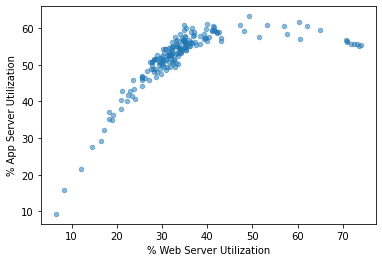

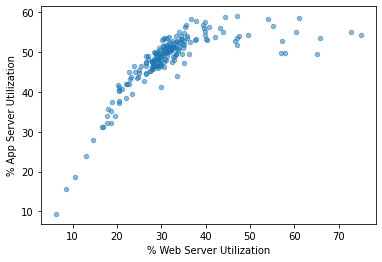

In [9]:
def get_perfmon_cpu_process_utilization(perfmon_df):
  df = pd.DataFrame()
  db_privileged_time_name = 'process_db2syscs_privileged_time'
  db_user_time_name = 'process_db2syscs_user_time'
  df['% DB Utilization'] = perfmon_df[db_privileged_time_name] + perfmon_df[db_user_time_name]
  df['% Web Server Utilization'] = perfmon_df['isp_01_process_whttpg_privileged_time'] + perfmon_df['isp_01_process_whttpg_user_time']

  app_df = pd.DataFrame()  
  for i in range(16):
    app_df[f'use_time_{i}'] = perfmon_df[f'isp_01_process_server_{i}_privileged_time'] + perfmon_df[f'isp_01_process_server_{i}_user_time']

  # Sum can be over 100% for 1 CPU because there are 2 CPUs (100% of both CPUs is 200%)    
  df['% App Server Utilization'] = app_df.sum(axis=1) / 2

  display(df.mean())
  df.plot.scatter(x='% Web Server Utilization', y='% App Server Utilization', alpha=0.5)
  return df

print("Note: Percent utilization rates are reported as percentage of 1 CPU core. \
The database manager has only one CPU core so results are unchanged, but the web server and app server run on a CPU with 2 cores, \
so the actual utilization is half of the reported values.")

print("--------- Current DB ---------")
cpu_process_utilization_df_case1 = get_perfmon_cpu_process_utilization(perfmon_df_case1)

print("--------- Big DB ---------")
cpu_process_utilization_df_case2 = get_perfmon_cpu_process_utilization(perfmon_df_case2)

## 4c. 
_Bookzilla test engineers have told you that there is very little virtual memory activity in their
systems and that you need not worry about this factor during performance evaluation. Based on
the perfmon data, do you agree with this assessment? Provide concrete reasons for your view._

This assessment is inaccurate based on the perfmon metric "\Paging File(_Total)\% Usage" that measures how much the Paging File is being used. Paging File is a Windows tool that helps with paging when the number of applications open on a computer exceed the amount of physical RAM being used thus requiring paging and using virtual memory (and disk space) to hold all of the application's RAM. For the current DB, the paging file is not in use on the database server, but on the big DB, the paging file is used up to 6% of the time. Given that paging is a slow process the test engineers should be more concerned about this number, especially if it grows any further.

See the plots below for the data source:

--------- Current DB ---------


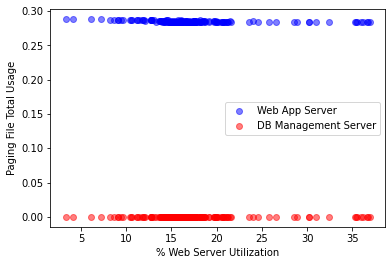

--------- Big DB ---------


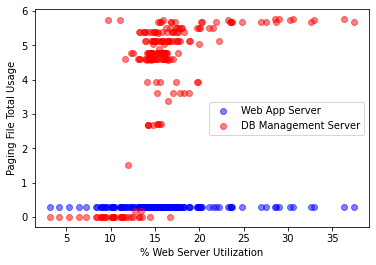

In [ ]:
def get_perfmon_memory_analysis(perfmon_df, process_utilization_df):
    plt.scatter(x=process_utilization_df['% Web Server Utilization'], y=perfmon_df['isp_01_paging_file_total_usage'], color='b', alpha=0.5, label="Web App Server")
    plt.scatter(x=process_utilization_df['% Web Server Utilization'], y=perfmon_df['paging_file_total_usage'], color='r', alpha=0.5, label="DB Management Server")
    plt.xlabel('% Web Server Utilization')
    plt.ylabel('Paging File Total Usage')
    plt.legend(loc="center right")
    plt.show()

print("--------- Current DB ---------")
get_perfmon_memory_analysis(perfmon_df_case1, cpu_process_utilization_df_case1)

print("--------- Big DB ---------")
get_perfmon_memory_analysis(perfmon_df_case2, cpu_process_utilization_df_case2)

## 4d.
_Do you agree with the thread/process concurrency information provided by Bookzilla for the Web, application, and database servers? Provide a justification based on the perfmon data._

Most of the given information about threads and process concurrency is correct. According to the perfmon column "\Process(db2syscs)\Thread Count", there are indeed 33 threads and there are 16 processes labelled "\\isp-01\Process(server#0)" through "\\isp-01\Process(server#15)", each of them with only one thread.

However, there are not 1000 threads when observing the column "isp_01_process_whttpg_thread_count". Instead there are 1008 threads. One possible explanation is that those 1008 threads are divided within some number of thread pools or other potential components within the web server.

The work is shown below to justify this data:

In [10]:
def get_perfmon_threads(perfmon_df):
  thread_df = perfmon_df[['process_db2syscs_thread_count', 'isp_01_process_whttpg_thread_count']].copy()

  app_df = pd.DataFrame()  
  for i in range(16):
    app_df[f'thread_count_{i}'] = perfmon_df[f'isp_01_process_server_{i}_thread_count']
 
  thread_df['total_app_server_thread_count'] = app_df.sum(axis=1)
  
  display(thread_df.mean())

print("--------- Current DB ---------")
get_perfmon_threads(perfmon_df_case1)

print("--------- Big DB ---------")
get_perfmon_threads(perfmon_df_case2)

--------- Current DB ---------


process_db2syscs_thread_count           33.0
isp_01_process_whttpg_thread_count    1008.0
total_app_server_thread_count           16.0
dtype: float64

--------- Big DB ---------


process_db2syscs_thread_count           33.0
isp_01_process_whttpg_thread_count    1008.0
total_app_server_thread_count           16.0
dtype: float64

## 4e.
_You will observe a slight discrepancy between what you computed in 4.b.4 and 4.b.3. For example, although the database management system process was the only process using the DB machine, its CPU utilization (computed in 4.b.4) is less than that of the CPU utilization of the DB machine computed in 4.b.3. Provide possible explanations for such mismatches._

One reason for the total CPU utilization reported by the processes is slightly less than the CPU utilization reported by the processor is because the processor is busy performing tasks that do not count towards any individual process' time. For example, switching between two different processes requires time to save the current context and load the new context. Event interruptions from a process not actively being operated on can also incur further switching costs. Another explanation is that there are other activities that are either classified as other processes or miscellanious tasks. Tasks like the performance monitor itself and the underlying Windows OS would also count for processor consumption but not appear as utilization for any individual processes of interest.

These mismatches are fairly minor, though it is a good reminder that a small amount of overhead needs to be considered for these systems so that they can perform their OS tasks as well.

## 4f.
_Based on your analysis in a), which resource is likely to be the bottleneck in Bookzilla’s current 1,000 books setup? Will the bottleneck shift with their planned expansion to 100,000 books?_

In the current system, the app server is the current bottleneck because it has the highest utilization of 52.18%  and thus it will be exhausted first when more users arrive. However with the expansion to 100,000 books, the bottleneck shifts over to the database management system with the highest utilization of 81.92% in the performance tests.

# 5. Analyzing httperf data

## Processing the data

### HTTPPerf Details Parsing

In [ ]:
def parse_httperf_details(file):
  httperf_details = pd.read_csv(file)
  httperf_details = httperf_details.rename(columns={
    '#Time of request completion (in ms after experiment start)': 'request_completion_time_ms',
    ' Session ID': 'session_id',
    ' Time taken to open connection with server (ms)': 'open_connection_ms',
    ' Time taken to receive first byte of reply (ms)': 'recieve_first_byte_ms',
    ' Time taken to receive last byte of reply (ms)': 'recieve_last_byte_ms',
    ' number of concurrent sessions in the system': 'num_sessions',
    ' size of response (bytes) ': 'response_bytes'
  })
  return httperf_details

httperf_details_case1 = parse_httperf_details("Case1_Data/case1-httperf-detailed-output.csv")
display(httperf_details_case1)
httperf_details_case2 = parse_httperf_details("Case2_Data/case2-httperf-detailed-output.txt")
display(httperf_details_case2)


,request_completion_time_ms,session_id,open_connection_ms,recieve_first_byte_ms,recieve_last_byte_ms,num_sessions,response_bytes
0,3.972507e+03,0,738.1,548.5,6.5,1,10972
1,5.808276e+03,1,22.3,151.4,6.4,2,10972
2,6.166294e+03,2,24.3,286.1,24.9,4,10972
3,6.269296e+03,3,35.1,175.3,22.1,4,10972
4,6.898326e+03,4,32.3,113.5,6.2,5,10972
...,...,...,...,...,...,...,...
89587,1.113908e+07,9930,-1.0,248.4,20.3,313,10866
89588,1.113888e+07,9048,-1.0,874.9,0.0,313,2581
89589,1.113901e+07,7266,-1.0,979.9,0.0,313,785
89590,1.113905e+07,7648,-1.0,949.3,0.0,313,2319


,request_completion_time_ms,session_id,open_connection_ms,recieve_first_byte_ms,recieve_last_byte_ms,num_sessions,response_bytes
0,4.000229e+03,0,841.7,626.7,6.7,1,10972
1,5.981286e+03,1,30.6,151.4,6.5,2,10972
2,6.368299e+03,2,23.6,146.5,7.6,4,10972
3,6.478311e+03,3,23.8,160.9,6.4,4,10972
4,7.157337e+03,4,24.6,145.5,6.3,5,10972
...,...,...,...,...,...,...,...
90394,1.211387e+07,9951,-1.0,106.2,22.4,231,10866
90395,1.211427e+07,9244,-1.0,68.4,0.0,231,1909
90396,1.211453e+07,7886,-1.0,92.7,0.0,231,1909
90397,1.211437e+07,9836,-1.0,253.1,0.0,231,2497


### HTTPerf Summary Parsing

In [ ]:
def parse_httperf_summary(file):
  http_summary = open(file)
  contents = http_summary.read()
  http_summary.close()
  return contents
case1_summary = parse_httperf_summary("Case1_Data/case1-httperf-summary-output.txt")
print('============================================================ CASE 1 ============================================================')
print(case1_summary)
case2_summary = parse_httperf_summary("Case2_Data/case2-httperf-summary-output.txt")
print('============================================================ CASE 2 ============================================================')
print(case2_summary)

============================================================ CASE 1 ============================================================
httperf --client=0/1 --server=134.117.61.81 --port=443 --uri=/ --period=e1.112 --send-buffer=4096 --recv-buffer=16384 --session-cookies --ssl --wsesslog=10000,1.000,/opt/data/bp-htz-1.txt
Maximum connect burst length: 2

Total: connections 10000 requests 89602 replies 89592 test-duration 11136.199 s

Connection rate: 0.9 conn/s (1113.6 ms/conn, <=450 concurrent connections)
Connection time [ms]: min 24451.1 avg 368514.5 max 6306556.7 median 0.0 stddev 560121.0
Connection time [ms]: connect 64.9
Connection length [replies/conn]: 9.248

Request rate: 8.0 req/s (124.3 ms/req)
Request size [B]: 205.0

Reply rate [replies/s]: min 0.4 avg 8.0 max 14.8 stddev 1.7 (2227 samples)
Reply time [ms]: response 1398.6 transfer 84.7
Reply size [B]: header 259.0 content 6415.0 footer 1.0 (total 6675.0)
Reply status: 1xx=0 2xx=75874 3xx=13718 4xx=0 5xx=0

CPU time [s]: user 19

## 5a.
_Let us now focus on application-level metrics such as throughput and response time. Compute
the following for both Current DB and Big DB:_

### 1) The per-request mean response time is the sum of the time to establish a connection with the server, wait till the first byte of the response, and ultimately obtain the last byte of the response.

This data can be retrieved from the http-details.

In [ ]:
def getMeanResponseTime(df):
    total_sessions = len(df.index)
    total_connection_time = df['open_connection_ms'].sum()
    total_first_byte_time = df['recieve_first_byte_ms'].sum()
    total_last_byte_time = df['recieve_last_byte_ms'].sum()
    per_request_mean_response_time = (total_connection_time+total_first_byte_time+total_last_byte_time) / total_sessions
    return per_request_mean_response_time

print("The per-request mean response time for Current DB is:", getMeanResponseTime(httperf_details_case1), "ms. ")
print("The per-request mean response time for Big DB is:", getMeanResponseTime(httperf_details_case2), "ms. ")

The per-request mean response time for Current DB is: 1489.7259230734885 ms. 
The per-request mean response time for Big DB is: 2018.9039845573514 ms. 


### 2) The throughput in request completions/second.
This is the total number of requests divided by the maximum completion time of all requests. The number of requests is readily available in the http summary data. 

In [ ]:
def getThroughput(max_completion_time_ms, request_number):
    return request_number / max_completion_time_ms * 1000

max_completion_time_case1 = httperf_details_case1['request_completion_time_ms'].max()
max_completion_time_case2 = httperf_details_case2['request_completion_time_ms'].max()
throughput_case1= getThroughput(max_completion_time_case1, 89602)
throughput_case2 = getThroughput(max_completion_time_case2, 90400)
print("The throughput for Current DB is:", throughput_case1, "request completions per second. ")
print("The throughput for Big DB is:", throughput_case2, "request completions per second. ")

The throughput for Current DB is: 8.043785557493146 request completions per second. 
The throughput for Big DB is: 7.462029233327774 request completions per second. 


### 3) The mean think time between successive requests from a customer
The average connection time per session, average number of replies per session, and the average reply and transfer time. All metrics are available in the http summary with the exception of average number of requests per session. This metrics is the quotient of replies and sessions. 

In [ ]:
total_replies_case1 = 89592
total_connections_case1 = 10000
average_replies_case1 = total_replies_case1 / total_connections_case1
average_single_reply_time_response_case1 = 1398.6
average_single_reply_time_transfer_case1 = 84.7
average_single_reply_time_case1 = average_single_reply_time_response_case1 + average_single_reply_time_transfer_case1
average_reply_time_case1 = average_replies_case1 * average_single_reply_time_case1
average_connection_time_case1 = 368514.5
average_think_time_case1 = average_connection_time_case1 - average_reply_time_case1
print("The mean think time between successive requests for Current DB is: ", average_think_time_case1, "ms. ")

total_replies_case2 = 90399
total_connections_case2 = 10000
average_replies_case2 = total_replies_case2 / total_connections_case2
average_single_reply_time_response_case2 = 1958.1
average_single_reply_time_transfer_case2 = 54.9
average_single_reply_time_case2 = average_single_reply_time_response_case2 + average_single_reply_time_transfer_case2
average_reply_time_case2 = average_replies_case2 * average_single_reply_time_case2
average_connection_time_case2 = 375877.2
average_think_time_case2 = average_connection_time_case2 - average_reply_time_case2
print("The mean think time between successive requests for Big DB is: ", average_think_time_case2, "ms. ")

The mean think time between successive requests for Current DB is:  355225.31864 ms. 
The mean think time between successive requests for Big DB is:  357679.8813 ms. 


### 4) The mean number of concurrent customer sessions in the system.
This is a product of throughput in customer sessions and average time per session. 

In [ ]:
customer_throughput_case1 = total_connections_case1 / max_completion_time_case1 * 1000
mean_customer_sessions_case1 = customer_throughput_case1 * average_connection_time_case1 / 1000
print("The mean number number of concurrent customer sessions for Current DB is: ", mean_customer_sessions_case1, ". ")

customer_throughput_case2 = total_connections_case2 / max_completion_time_case2 * 1000
mean_customer_sessions_case2 = customer_throughput_case2 * average_connection_time_case2 / 1000
print("The mean number number of concurrent customer sessions for Big DB is: ", mean_customer_sessions_case2, ". ")


The mean number number of concurrent customer sessions for Current DB is:  330.82426874699314 . 
The mean number number of concurrent customer sessions for Big DB is:  310.26622284749897 . 


## 5b - Network Claims
Bookzilla’s test engineers have told you that the network was lightly utilized and that it can be ignored as a factor in your study. Is there any data available to back up this claim?

The network provides a dedicated 100 Mbps connection between machines. Thus, a network usage that is lower than this bandwidth would support the claim that the network is not heavily utilized. With the average number of requests per second, and the average number of bytes transferred per second, an estimate of the average utilized bandwidth can be produced. 

In [ ]:
def getMeanMegaBytesTransferedPerSecond(df, throughput):
    total_bytes = df['response_bytes'].sum()
    total_requests = len(df.index)
    
    return total_bytes/total_requests * throughput / 125000

print("The mean number of MBPS transfered pers second for Current DB is: ", getMeanMegaBytesTransferedPerSecond(httperf_details_case1, throughput_case1), ". ")
print("The mean number of MBPS transfered pers second for Big DB is: ", getMeanMegaBytesTransferedPerSecond(httperf_details_case2, throughput_case2), ". ")

The mean number of MBPS transfered pers second for Current DB is:  0.42961518782284636 . 
The mean number of MBPS transfered pers second for Big DB is:  0.40795029563880997 . 


From the results of 5b, it can be seen that the average network usage is below 1% of the network bandwidth. A worst case scenario is assumed below, where all the bytes are transferred at once, assuming all sessions and requests are concurrent.

In [ ]:
def getTimeToTransferAllBytes(df):
    total_bytes = df['response_bytes'].sum()
    return total_bytes / 125000 / 100
print("The time it would take to transfer all bytes of all sessions for Current DB is: ", getTimeToTransferAllBytes(httperf_details_case1), "seconds. ")
print("The time it would take to transfer all bytes of all sessions for Big DB is: ", getTimeToTransferAllBytes(httperf_details_case2), "seconds. ")


The time it would take to transfer all bytes of all sessions for Current DB is:  47.85070864 seconds. 
The time it would take to transfer all bytes of all sessions for Big DB is:  49.42127352000001 seconds. 


The worst case scenario exceeds the average customer think time for both current and big DB, suggesting that there is a scenario where the network could be the bottle neck. However, section 4.b.4 shows that utilization of the database, webserver, and app server all exceed 30%, which are considerably higher than 1%. Thus, even in the worst case scenario, the bottle neck will not be the network. 

## 5c - Implications of Supporting a Larger Catalog
Discuss the implications of supporting a larger catalog of books on the experience of an end-user of Bookzilla.

With respect to the 4 metrics discussed in 5a, the effect of a larger catalog will be discussed with respect to each metrics individually.

1) per-request mean response time - this would see an increase proportional to the increase in catalog size as the response likely contains the catalog. 

2) Throughput in requests/second - this would decrease as the number of per-request mean response time is increasing, allowing for fewer completed requests per second. 

3) Mean think time between successive requests - larger catalogs imply a greater think time as there is more for the customer to look at

4) Mean number of concurrent sessions - this would increase as customer think time increases

Overall, the customers would likely notice similar, or slightly worse, performance with a bigger catalogue. Although the size of requests would increase, and the throughput limit of requests/second would decrease, an increase think time despite more concurrent sessions, would keep the load similar to what it is now. However, more concurrent sessions increases likelyhood of more concurrent requests, with more likelyhood of reaching 100% utlization on a bottleneck resource. 

# 6. Computing resource demands for use in a performance model
Do the computations asked for both Current DB and Big DB.

__You will need metrics marked in bold to parameterize the performance model used in Section B.__

a) As discussed in class, the mean resource demands placed by a customer request on various system resources such as CPUs and disks are essential for building performance models. Apply the utilization law to compute the mean demands placed by request on the following resources:

### 1) Web/App machine CPUs
Uk = Xk * Sk
utilization = throughput * service time request 

In [ ]:
print(df['isp_01_physicaldisk_total_avg_disk_sec_read'])
print(df['isp_01_physicaldisk_total_avg_disk_sec_write'])
print(df['isp_01_physicaldisk_total_disk_reads_sec'])
print(df['isp_01_physicaldisk_total_disk_writes_sec'])

0      0.009704
1      0.013742
2      0.010286
3      0.000000
4      0.000000
         ...   
179    0.000000
180    0.000000
181    0.000000
182    0.000000
183    0.000000
Name: isp_01_physicaldisk_total_avg_disk_sec_read, Length: 184, dtype: float64
